In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [158]:
df=pd.read_csv("DATASET.csv")

In [159]:
df.dtypes

,0
mileage,int64
price,int64
model_year,int64
make,object
model,object
series,object
style,object
certified,int64
price_analysis,int64
drivetrain_from_vin,object


In [160]:
df_copy=df.copy()

# Missing Values
This includes:

1.   Missing value summary
2.   Dropping irrelevant columns
3.   Outliers being dealt with IQR
4.   Dropping duplicates
5.   Median values
6.   Replacing 7 and 6 to A and M
7.   Knn imputation





In [161]:
# Check for missing values in different forms
# Define special_missing_values first!
special_missing_values = ['N/A', '?', '-']  # Replace with your actual special missing values

missing_summary = pd.DataFrame({
    "NaN Count": df_copy.isnull().sum(),
    "Zero Count": (df_copy == 0).sum(),
    "Empty String Count": (df_copy == "").sum(),
    "Special Missing Count": df_copy.isin(special_missing_values).sum()
})

# Display the missing value summary
print(missing_summary)

                       NaN Count  Zero Count  Empty String Count  \
mileage                        0       10175                   0   
price                          0        4340                   0   
model_year                     0           0                   0   
make                           0           0                   0   
model                          0           0                   0   
series                       825           0                   0   
style                          0           0                   0   
certified                      0      144156                   0   
price_analysis                 0      133080                   0   
drivetrain_from_vin            0           0                   0   
engine_from_vin                0           0                   0   
transmission_from_vin          0           0                   0   
fuel_type_from_vin             0           0                   0   
number_price_changes           0       59921    

In [162]:
# Get the count of unique values for each column
unique_counts = df_copy.nunique()

# Display the counts of unique values for each column
print(unique_counts)

mileage                  46874
price                    39651
model_year                  38
make                        45
model                      702
series                    1630
style                      664
certified                    2
price_analysis               2
drivetrain_from_vin          4
engine_from_vin            974
transmission_from_vin        4
fuel_type_from_vin           7
number_price_changes       120
stock_type                   2
dtype: int64


In [163]:
df_copy.drop('series', axis=1, inplace=True)



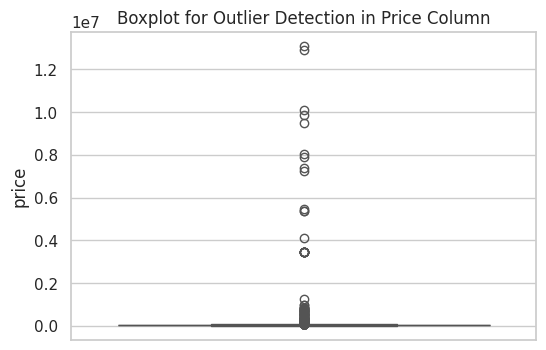

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=df_copy['price'])
plt.title('Boxplot for Outlier Detection in Price Column')
plt.show()



In [165]:
Q1 = df_copy['price'].quantile(0.25)
Q3 = df_copy['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_copy[(df_copy['price'] < lower_bound) | (df_copy['price'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers in 'price' column (IQR method): {outlier_count}")


Number of outliers in 'price' column (IQR method): 3232


In [166]:

def detect_outliers_iqr(df_copy, columns):
    """Detect outliers using the IQR method for multiple columns."""
    outlier_counts = {}

    for col in columns:
        if df_copy[col].dtype in ['int64', 'float64']:  # Check only numeric columns
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
            outlier_counts[col] = outliers.shape[0]

    return outlier_counts

# Select numeric columns you want to check for outliers
numeric_columns = ['mileage', 'price', 'model_year', 'number_price_changes']

# Apply the function
outliers_dict = detect_outliers_iqr(df_copy, numeric_columns)

# Display outlier counts
for col, count in outliers_dict.items():
    print(f"Number of outliers in '{col}' column: {count}")


Number of outliers in 'mileage' column: 4066
Number of outliers in 'price' column: 3232
Number of outliers in 'model_year' column: 5517
Number of outliers in 'number_price_changes' column: 18786


Price Analysis Outliers:
Some cars have extremely high or low prices, which may indicate rare models or errors.
Older cars tend to have lower prices, while newer ones have very high prices.
Used cars generally show more variation in pricing than new ones.


Model Year Outliers:
Very old cars (1980s-90s) and brand-new cars (2024) stand out in the data.
Older cars might be rare collectibles or heavily used, affecting their value.
Newer cars have high prices, likely due to demand and dealership pricing.


Number of Price Changes Outliers:
Some cars have had too many price changes, which might indicate demand fluctuations.
Frequent price changes could be due to dealership strategies or incorrect data.
Cars with very few or no price changes are likely stable in demand or pricing.


In [167]:
def cap_outliers(df_copy, column):
    """Cap outliers in a specific column based on IQR."""
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values that are below the lower bound or above the upper bound
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)

    return df_copy

# Apply capping to each column
df_copy = cap_outliers(df_copy, 'mileage')
df_copy = cap_outliers(df_copy, 'price')
df_copy = cap_outliers(df_copy, 'model_year')
df_copy = cap_outliers(df_copy, 'number_price_changes')

# Check the cleaned data
print(df_copy[['mileage', 'price', 'model_year', 'number_price_changes']].describe())


            mileage          price     model_year  number_price_changes
count  145114.00000  145114.000000  145114.000000         145114.000000
mean    44673.71581   46318.042505    2021.508814              2.138291
std     57660.72352   26662.986150       3.064938              2.673191
min         0.00000       0.000000    2014.000000              0.000000
25%        15.00000   26990.000000    2020.000000              0.000000
50%      9650.00000   41900.000000    2023.000000              1.000000
75%     80119.00000   62770.250000    2024.000000              3.000000
max    200275.00000  116440.625000    2024.000000              7.500000


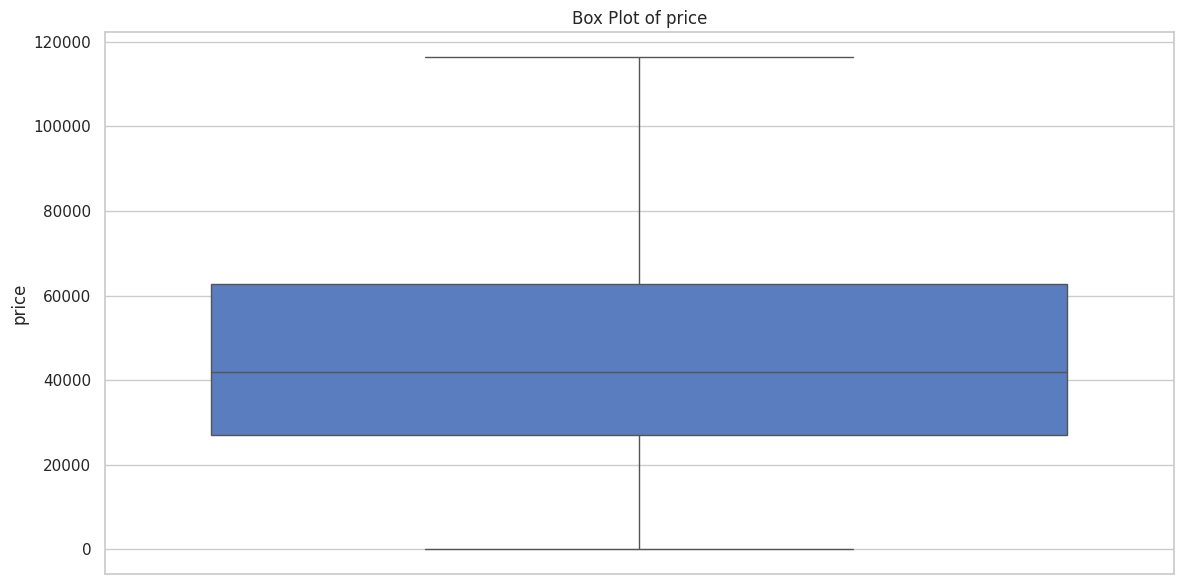

In [168]:
# Columns to check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['price']

# Create box plots
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, len(columns_to_check), i)
    sns.boxplot(y=df_copy[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

The box plot for the "price" column shows that most prices are similar and clustered in a lower range. However, there are several high outlier prices that stand out, meaning some items are much more expensive than the rest. The median price is marked in the middle of the box, helping to see where most prices fall. Overall, while most prices are consistent, the presence of these high outliers suggests there are a few luxury or unusual items that could affect the analysis.

In [169]:
#reset the row index for the dataset
df_copy_unique= df_copy.reset_index(drop=True)
df_copy_unique


,mileage,price,model_year,make,model,style,certified,price_analysis,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,stock_type
0,200275,11500.0,2014,Chevrolet,Camaro,2D Coupe,0,0,RWD,5.7L V8 TBI,A,Gas,0.0,USED
1,48905,8700.0,2014,Chrysler,Fifth Avenue,4D Sedan,0,0,RWD,5.2L V8,A,Gas,0.0,USED
2,174640,6000.0,2014,Cadillac,DeVille,4D Sedan,0,0,FWD,4.5L V8 DI,A,Gas,0.0,USED
3,174640,6000.0,2014,Cadillac,DeVille,4D Sedan,0,0,FWD,4.5L V8 DI,A,Gas,4.0,USED
4,200275,8500.0,2014,Chevrolet,Camaro,2D Coupe,0,0,RWD,5.7L V8 TBI,A,Gas,0.0,USED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,30,105781.0,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,7.5,NEW
145110,30,105990.0,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,7.5,NEW
145111,2454,108201.0,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,2.0,USED
145112,2454,108201.0,2024,Volvo,XC90,4D Utility AWD,0,0,AWD,2.0L I-4 DI PHEV T/C,A,PHEV,7.5,NEW


Price column summary after Group-Based Median Replacement:
count    145114.000000
mean      46318.042505
std       26662.986150
min           0.000000
25%       26990.000000
50%       41900.000000
75%       62770.250000
max      116440.625000
Name: price, dtype: float64


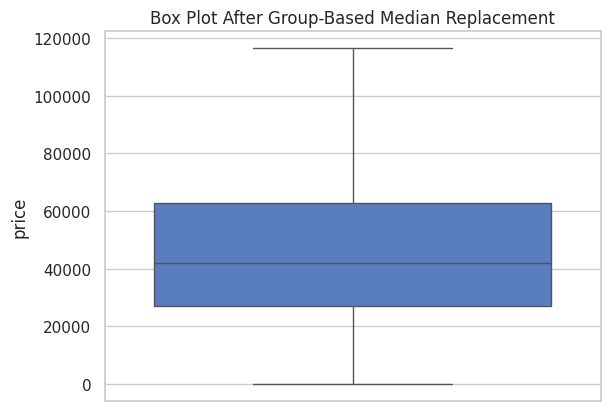

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'price' column is numeric
df_copy_unique['price'] = pd.to_numeric(df_copy_unique['price'], errors='coerce')

# Calculate IQR
Q1 = df_copy_unique['price'].quantile(0.25)
Q3 = df_copy_unique['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define function to clip and replace outliers
def clip_and_replace(x):
    x_clipped = x.clip(lower=lower_bound, upper=upper_bound)
    median_value = x.median()
    return x_clipped.fillna(median_value)

# Apply transformation using groupby
df_copy_unique['price'] = df_copy_unique.groupby(['make', 'model_year'])['price'].transform(clip_and_replace)

# Check the summary of the price column after replacement
print("Price column summary after Group-Based Median Replacement:")
print(df_copy_unique['price'].describe())

# Visualize the results with a boxplot
sns.boxplot(y=df_copy_unique['price'])
plt.title('Box Plot After Group-Based Median Replacement')
plt.show()



In this analysis, we looked at the "price" data and found some prices that were much higher than the rest, which we called outliers. We replaced these high outlier prices with the median price for similar cars to make the data more consistent. After making these changes, the box plot shows that the prices are now more evenly spread out and centered. The summary statistics also show that the prices have a narrower range, meaning they are more typical. Overall, this process helped to smooth out the price data and make it easier to analyze.

In [171]:
import pandas as pd

# Ensure 'price' column is numeric
df_copy_unique['price'] = pd.to_numeric(df_copy_unique['price'], errors='coerce')

# Calculate IQR
Q1 = df_copy_unique['price'].quantile(0.25)
Q3 = df_copy_unique['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_copy_unique = df_copy_unique[(df_copy_unique['price'] >= lower_bound) & (df_copy_unique['price'] <= upper_bound)]

# Reset index (optional but recommended)
df_copy = df_copy_unique.reset_index(drop=True)

In [172]:
df_clean_dulpicated_sum = {f"The number of duplicated rows are: {df_copy.duplicated().sum()}"}  # Replace df_clean with df_copy
print(df_clean_dulpicated_sum)
df_copy.duplicated()
df_copy.shape
df_copy.drop_duplicates(inplace=True)
df_copy.shape

{'The number of duplicated rows are: 30535'}


(114579, 14)

In [173]:
# Count the number of vehicles with 0 mileage grouped by stock_type (New/Used)
zero_mileage_counts = df_copy[df_copy["mileage"] == 0]["stock_type"].value_counts()

# Display the result
zero_mileage_counts

,count
stock_type,
NEW,5761
USED,27


In [174]:
# Step 1: Replace 'NEW' with 0
df_copy['mileage'] = df_copy['mileage'].replace('New', 0)

# Step 2: Replace 'USED' with the median mileage
median_mileage = df_copy[df_copy['mileage'] > 0]['mileage'].median()  # Calculate the median of used vehicles
df_copy.loc[(df_copy['stock_type'] == 'USED') & (df_copy['mileage'] == 0), 'mileage'] = median_mileage




In [175]:

# Check the number of missing values in the mileage column
missing_values = df_copy['mileage'].isnull().sum()
print(f"Missing values in 'mileage' column: {missing_values}")


Missing values in 'mileage' column: 0


In [176]:
df_copy['transmission_from_vin'].value_counts()

,count
transmission_from_vin,
A,111285
M,3269
7,23
6,2


In [177]:
# Convert column to string explicitly before replacing values
df_copy['transmission_from_vin'] = df_copy['transmission_from_vin'].astype(str).replace({'7': 'A', '6': 'M'})

# Check unique values after replacement
df_copy['transmission_from_vin'].unique()


array(['A', 'M'], dtype=object)

In [178]:
from sklearn.impute import KNNImputer

# Replace zeros with NaN
df_copy['price'] = df_copy['price'].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_copy['price'] = imputer.fit_transform(df_copy[['price', 'mileage', 'model_year']])[:, 0]

# Check the number of missing values in the price column
missing_values = df_copy['price'].isnull().sum()
print(f"Missing values in 'price' column: {missing_values}")

Missing values in 'price' column: 0


In [179]:
# Get unique values for the "Certified" and "Price Analysis" columns
df_copy['price_analysis'].value_counts()

,count
price_analysis,
0,105042
1,9537


In [180]:
df_copy['certified'].value_counts()

,count
certified,
0,113633
1,946


In [181]:
# Ensure the column is treated as a string, then extract only numeric engine displacement
df_copy['engine_from_vin'] = df_copy['engine_from_vin'].astype(str).str.extract(r'(\d+\.\d+)')


In [182]:
# Replace zeros with NaN
df_copy['engine_from_vin'] = df_copy['engine_from_vin'].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_copy['engine_from_vin'] = imputer.fit_transform(df_copy[['engine_from_vin', 'mileage', 'model_year']])[:, 0]

# Check the number of missing values in the price column
missing_values = df_copy['engine_from_vin'].isnull().sum()
print(f"Missing values in 'engine_from_vin' column: {missing_values}")

Missing values in 'engine_from_vin' column: 0


In [183]:
df_copy.isnull().sum() + (df_copy == 0).sum()

,0
mileage,5761
price,0
model_year,0
make,0
model,0
style,0
certified,113633
price_analysis,105042
drivetrain_from_vin,0
engine_from_vin,0


# Visualizations

In [126]:
# the top brands of vehicles
df_copy['make'].value_counts()

,count
make,
Ford,16342
Chevrolet,10175
Ram,9938
GMC,8907
Jeep,8423
Nissan,7204
Hyundai,7165
Volkswagen,5541
Honda,5434


In [138]:
# filtering out the data into manual transmissions and top 10 brands
top_10_makes = df_copy['make'].value_counts().nlargest(10).index

top_10_makes = df_copy['make'].value_counts().nlargest(10).index
filtered_df = df_copy[df_copy['make'].isin(top_10_makes)]
manual_transmissions_df = filtered_df[filtered_df['transmission_from_vin'] == 'M']

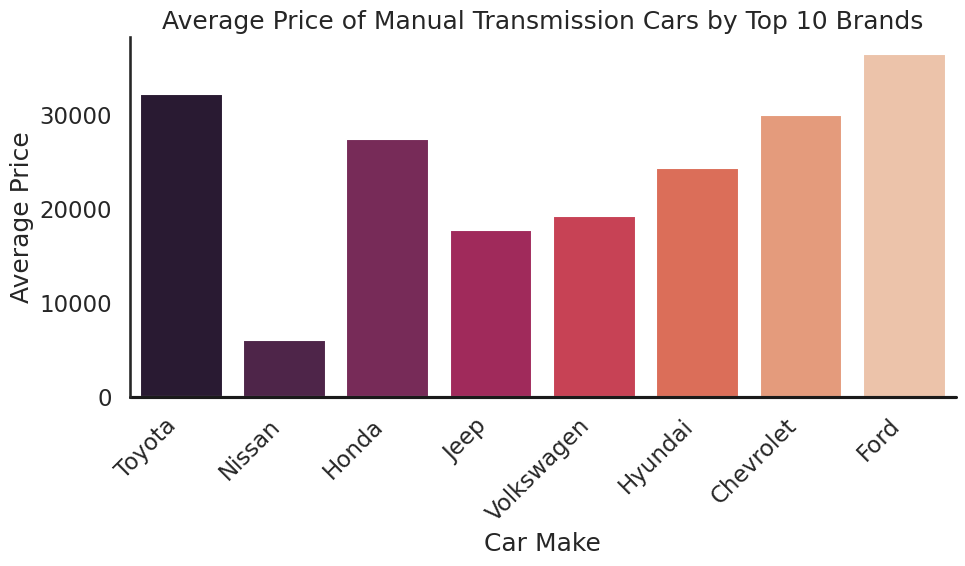

In [187]:
# Creating a bar chart

sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Get data for the bar plot:
x = manual_transmissions_df['make'].unique()
y = manual_transmissions_df.groupby('make')['price'].mean()

# Create a single subplot:
f, ax1 = plt.subplots(1, 1, figsize=(10, 6))

sns.barplot(x=x, y=y, palette="rocket", hue=x ,ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Price")
ax1.set_xlabel("Car Make")
ax1.set_title("Average Price of Manual Transmission Cars by Top 10 Brands")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

sns.despine(bottom=True)
plt.tight_layout()
plt.show()

In [145]:
# getting the top 5 models and listing what brand they are
top_5_models = df_copy['model'].value_counts().nlargest(5).index
top_5_model_make = df_copy.groupby('model')['make'].first().loc[top_5_models]
top_5_model_make

,make
model,
F150,Ford
1500,Ram
Sierra 1500,GMC
Silverado 1500,Chevrolet
1500 Classic,Ram


In [189]:
# filtering by manual transmission for top 10 brands of vehicles
filtered_df = df_copy[df_copy['make'].isin(top_10_makes)]
manual_transmissions_df = filtered_df[filtered_df['transmission_from_vin'] == 'M']

In [195]:
# Get the top 5 models and their corresponding makes
top_5_models = df_copy['model'].value_counts().nlargest(5).index
top_5_model_make = df_copy.groupby('model')['make'].first().loc[top_5_models]

# Combine top 10 makes and makes of top 5 models
all_makes = top_10_makes.union(top_5_model_make.values)

# Filter the dataframe
filtered_df = df_copy[df_copy['make'].isin(all_makes)]
manual_transmissions_df = filtered_df[filtered_df['transmission_from_vin'] == 'M']


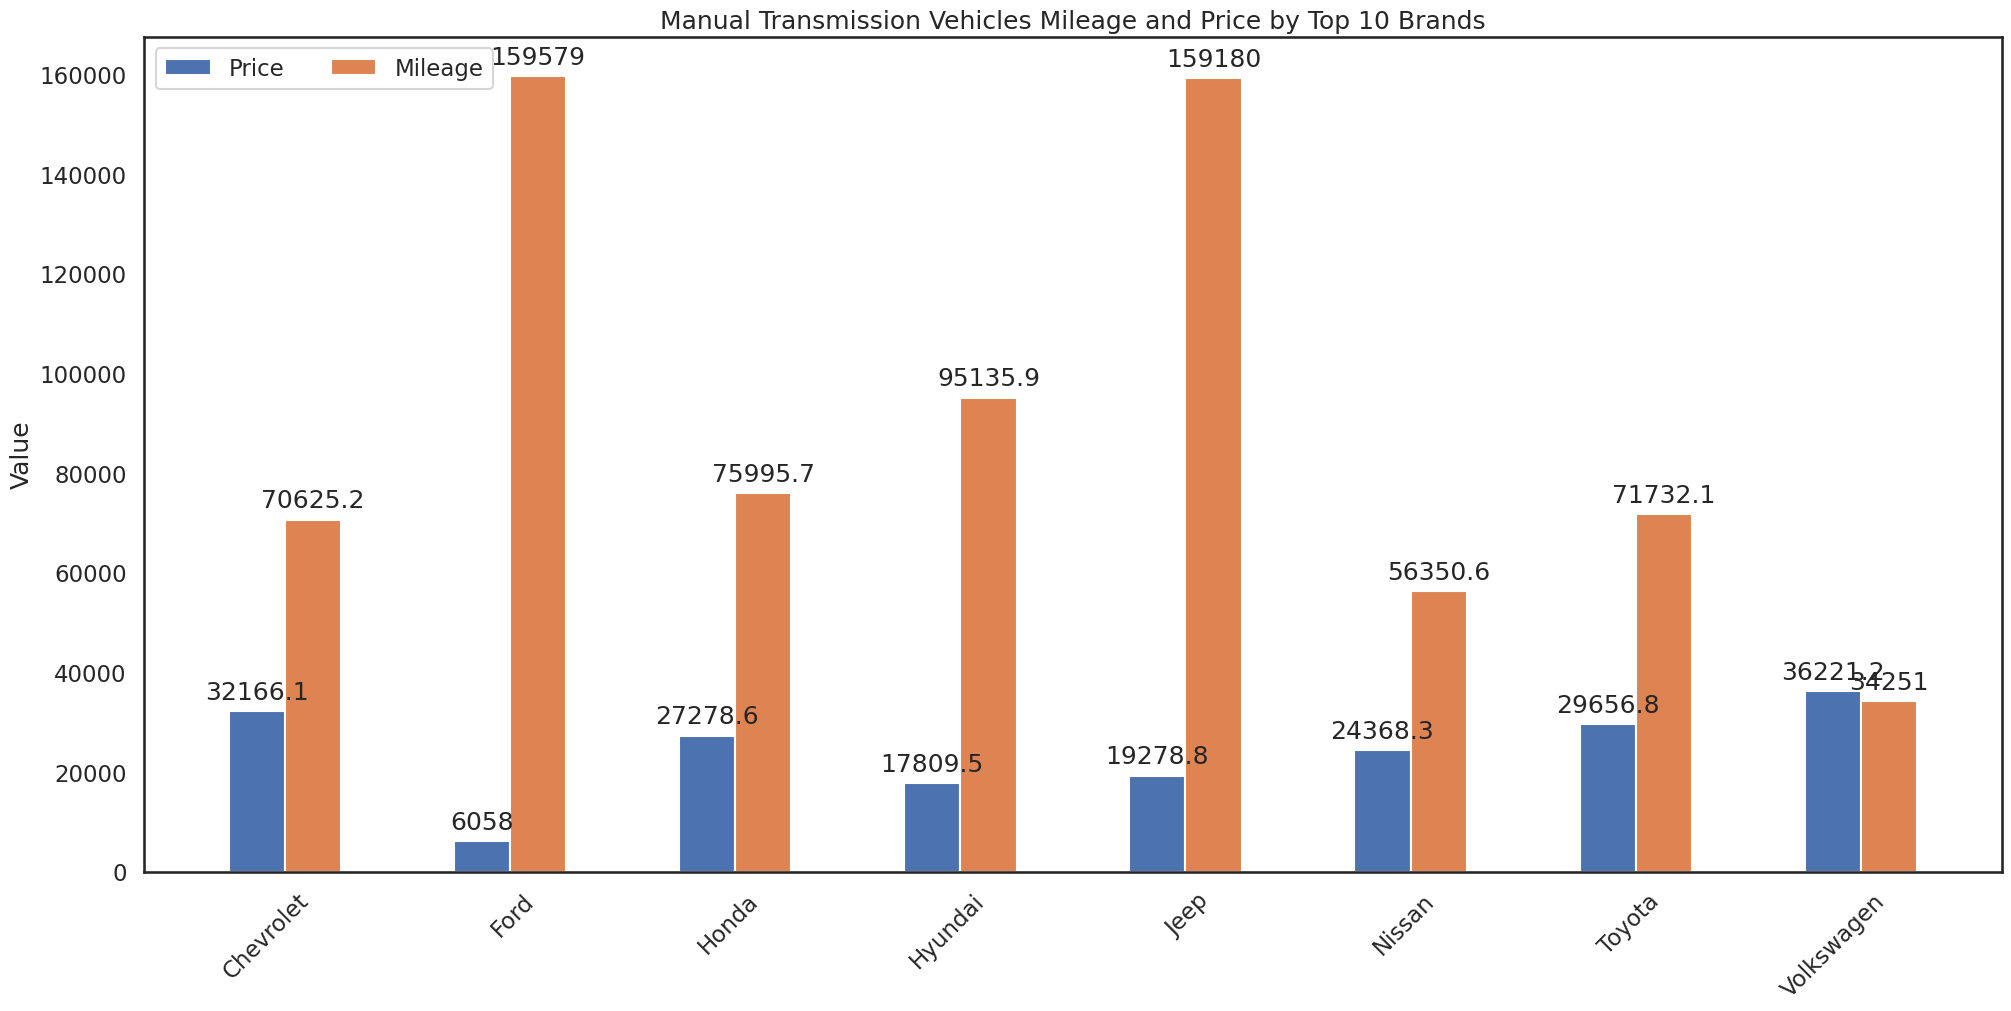

In [218]:
import matplotlib.pyplot as plt

# Group data and calculate means
make_means = manual_transmissions_df.groupby('make')[['price', 'mileage']].mean()

# Extract data for plotting
makes = make_means.index.tolist()
price_means = make_means['price'].tolist()
mileage_means = make_means['mileage'].tolist()


x = np.arange(len(makes))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax2 = plt.subplots(figsize=(20,10),layout='constrained')

for attribute, measurement in zip(['Price', 'Mileage'], [price_means, mileage_means]):
    offset = width * multiplier
    rects = ax2.bar(x + offset, measurement, width, label=attribute)
    ax2.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Value')
ax2.set_title('Manual Transmission Vehicles Mileage and Price by Top 10 Brands')
ax2.set_xticks(x + width, makes, rotation=45, ha='right')
ax2.legend(loc='upper left', ncols=2)

plt.show()

In [ ]:
# Filter data for automatic transmissions
automatic_transmissions_df = filtered_df[filtered_df['transmission_from_vin'] == 'A']

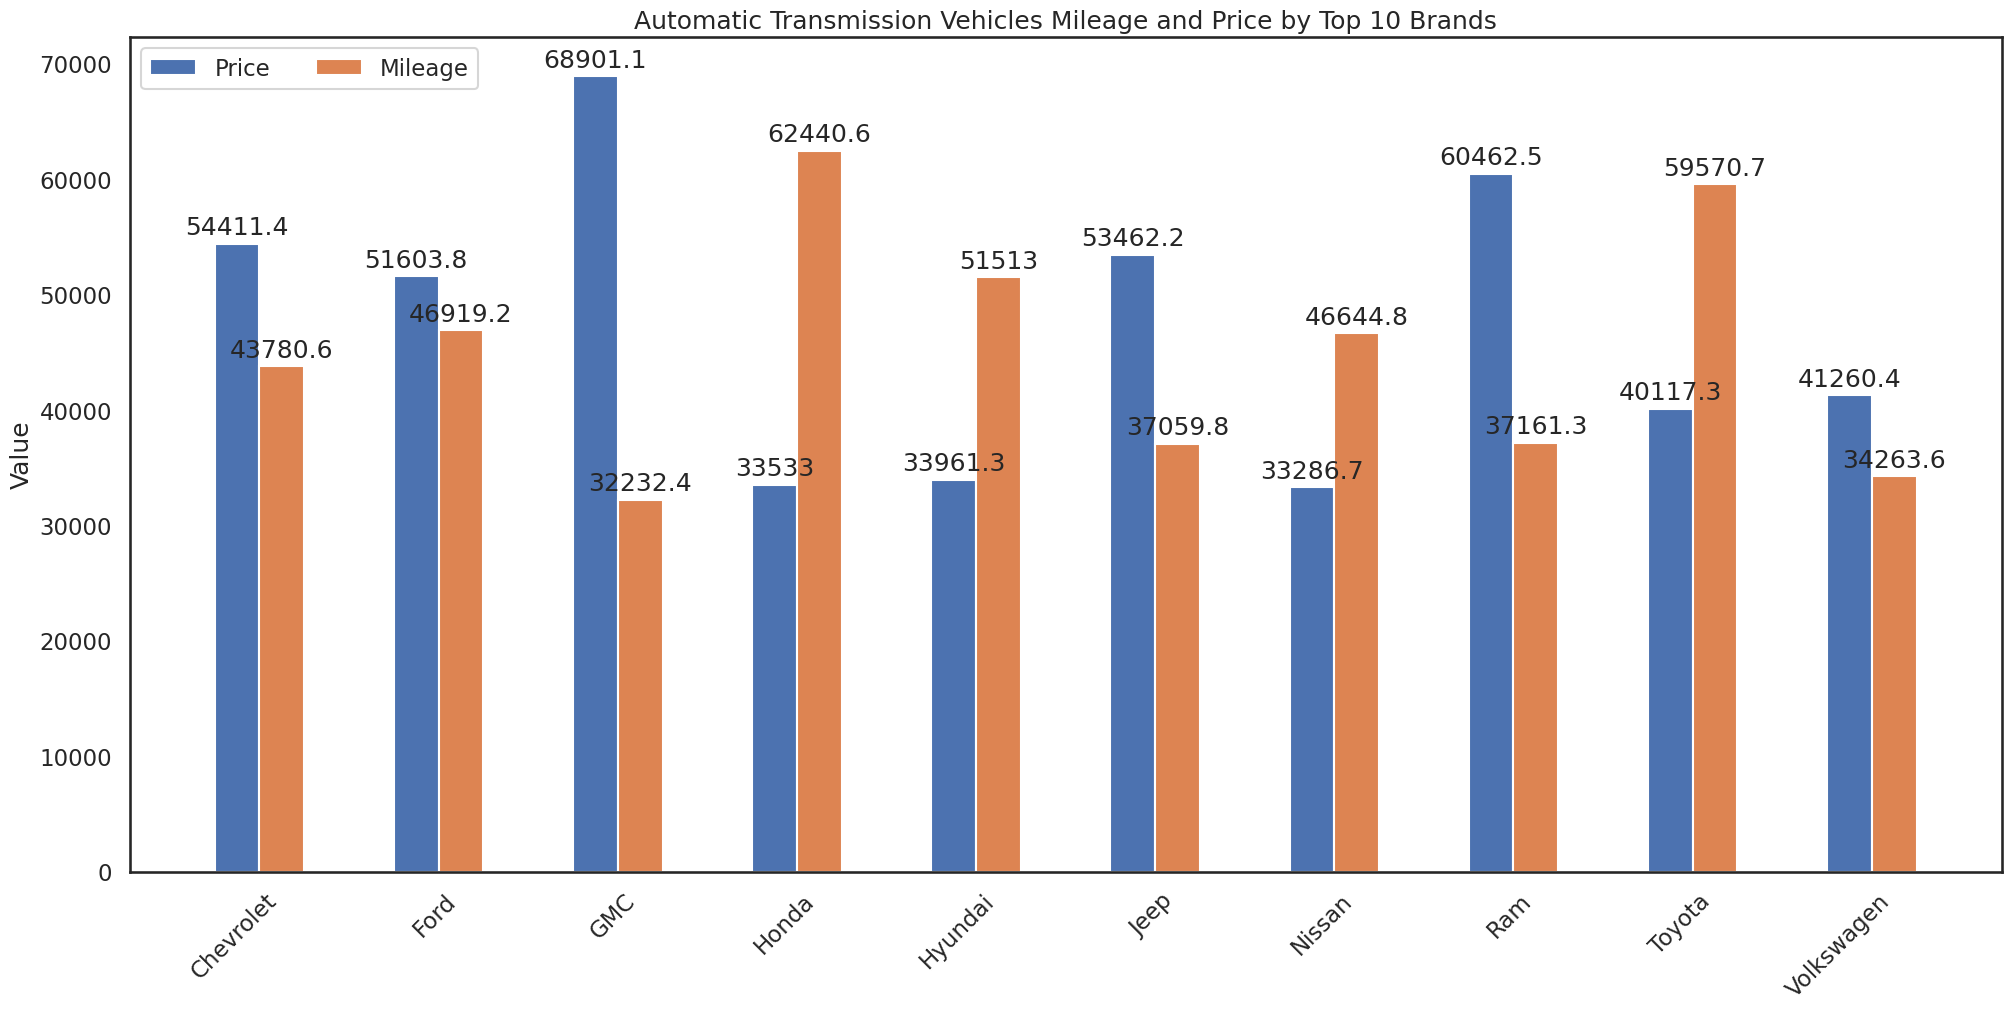

In [219]:
import numpy as np
import matplotlib.pyplot as plt

# Group data and calculate means
make_means_auto = automatic_transmissions_df.groupby('make')[['price', 'mileage']].mean()

# Extract data for plotting
makes_auto = make_means_auto.index.tolist()
price_means_auto = make_means_auto['price'].tolist()
mileage_means_auto = make_means_auto['mileage'].tolist()

x_auto = np.arange(len(makes_auto))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax3 = plt.subplots(figsize=(20,10),layout='constrained')

for attribute, measurement in zip(['Price', 'Mileage'], [price_means_auto, mileage_means_auto]):
    offset = width * multiplier
    rects = ax3.bar(x_auto + offset, measurement, width, label=attribute)
    ax3.bar_label(rects, padding=3)
    multiplier += 1

# labels and title
ax3.set_ylabel('Value')
ax3.set_title('Automatic Transmission Vehicles Mileage and Price by Top 10 Brands')
ax3.set_xticks(x_auto + width, makes_auto, rotation=45, ha='right')
ax3.legend(loc='upper left', ncols=3)

plt.show()

In [216]:
print(df_copy['price'].describe())


count    114579.000000
mean      47706.666608
std       25297.873196
min           1.000000
25%       27995.000000
50%       42995.000000
75%       63770.000000
max      116440.625000
Name: price, dtype: float64


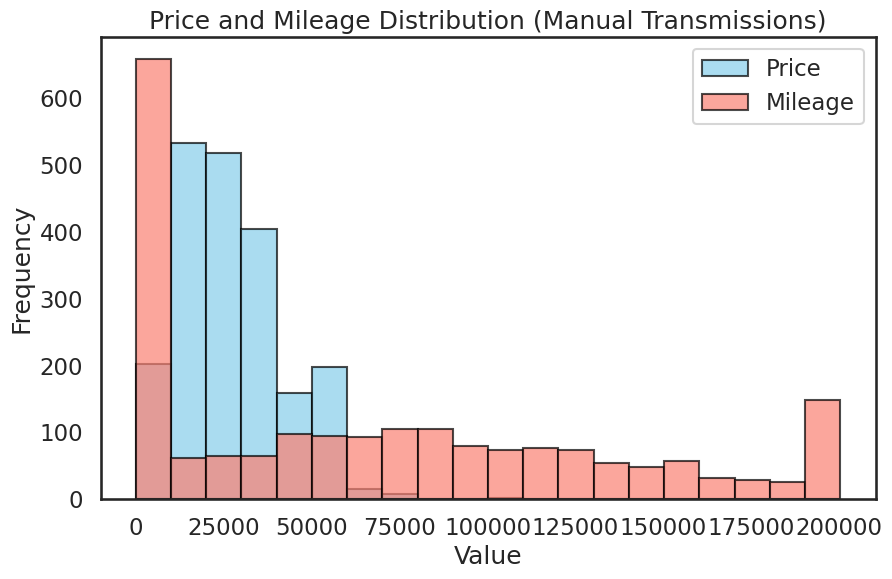

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for histograms
price_data = manual_transmissions_df['price']
mileage_data = manual_transmissions_df['mileage']

# Calculate bin edges for even bins
min_value = min(price_data.min(), mileage_data.min())
max_value = max(price_data.max(), mileage_data.max())
num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins + 1)

fig, ax4 = plt.subplots(figsize=(10, 6))  # Create a single subplot

# Layered histograms with even bins
ax4.hist(price_data, bins=bin_edges, color='skyblue', edgecolor='black', alpha=0.7, label='Price')
ax4.hist(mileage_data, bins=bin_edges, color='salmon', edgecolor='black', alpha=0.7, label='Mileage')

# Add labels, title, and legend
ax4.set_xlabel('Value')
ax4.set_ylabel('Frequency')
ax4.set_title('Price and Mileage Distribution for Manual Transmissions')
ax4.legend()

plt.show()

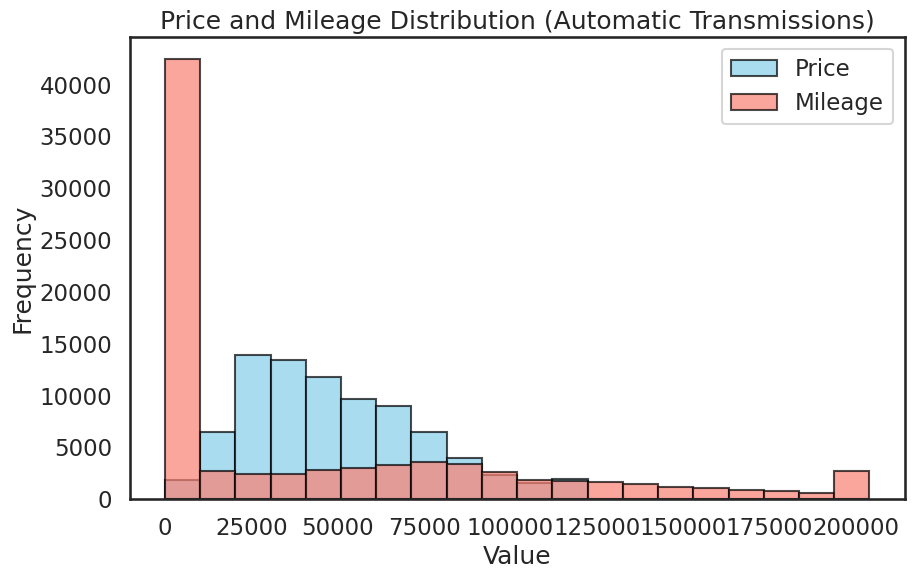

In [230]:
import matplotlib.pyplot as plt
import numpy as np


# Extract data for histograms
price_data = automatic_transmissions_df['price']
mileage_data = automatic_transmissions_df['mileage']

# Calculate bin edges for even bins
min_value = min(price_data.min(), mileage_data.min())
max_value = max(price_data.max(), mileage_data.max())
num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins + 1)

fig, ax5 = plt.subplots(figsize=(10, 6))  # Create a single subplot

# Layered histograms with even bins
ax5.hist(price_data, bins=bin_edges, color='skyblue', edgecolor='black', alpha=0.7, label='Price')
ax5.hist(mileage_data, bins=bin_edges, color='salmon', edgecolor='black', alpha=0.7, label='Mileage')

# Add labels, title, and legend
ax5.set_xlabel('Value')
ax5.set_ylabel('Frequency')
ax5.set_title('Price and Mileage Distribution (Automatic Transmissions)')
ax5.legend()

plt.show()

In [221]:
df_copy["transmission_from_vin"].unique()

array(['A', 'M'], dtype=object)

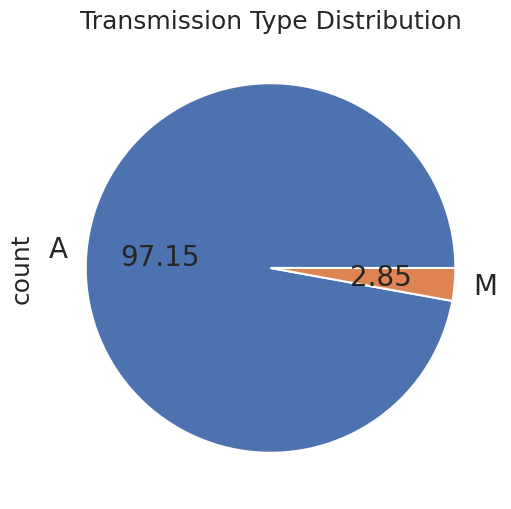

In [222]:
# Convert 'transmission_from_vin' to categorical
df_copy['transmission_from_vin'] = pd.Categorical(df_copy['transmission_from_vin'])

# Calculate frequency of each transmission type
transmission_counts = df_copy['transmission_from_vin'].value_counts()
# Convert 'transmission_from_vin' to categorical
df_copy['transmission_from_vin'] = pd.Categorical(df_copy['transmission_from_vin'])

# Calculate frequency of each transmission type
transmission_counts = df_copy['transmission_from_vin'].value_counts()

# Generate pie chart
transmission_counts.plot.pie(figsize=(6, 6),autopct="%.2f",fontsize=20,subplots=True)
plt.title("Transmission Type Distribution")
plt.show()

This pie chart shows the types of transmissions in the dataset. About 97.18% of the cars have automatic transmissions ("A"), while only 2.82% have manual transmissions ("M").

We replaced the value "7" (which occured most ) with "automatic" because automatic cars are more common today. So, the chart clearly shows that most cars have automatic transmissions.

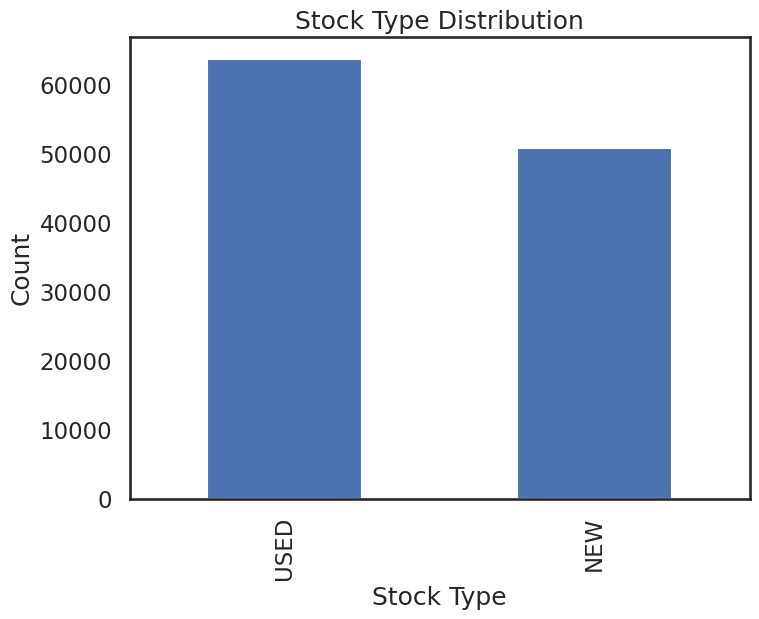

In [223]:
# generate bar chart for used vehicle and new vehicle
plt.figure(figsize=(8, 6))
df_copy['stock_type'].value_counts().plot(kind='bar')
plt.title('Stock Type Distribution')
plt.xlabel('Stock Type')
plt.ylabel('Count')
plt.show()

This bar chart shows the distribution of car stock types. It reveals that there are significantly more used cars than new cars, with used cars having a count of over 60,000, while new cars are around 50,000. Overall, this indicates that used cars are much more common in the dataset.





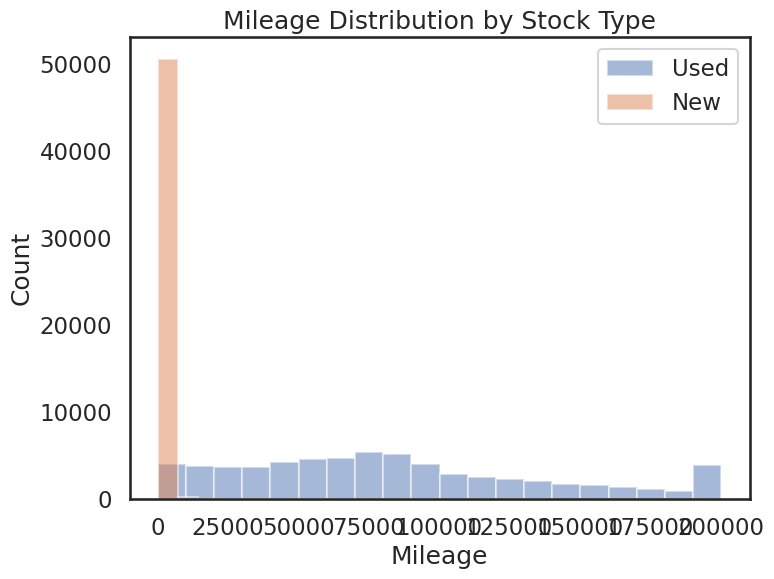

In [224]:
# check the mileage distribution according to stock type
plt.figure(figsize=(8, 6))
df_copy[df_copy['stock_type'] == 'USED']['mileage'].plot(kind='hist', bins=20, alpha=0.5, label='Used')
df_copy[df_copy['stock_type'] == 'NEW']['mileage'].plot(kind='hist', bins=20, alpha=0.5, label='New')
plt
plt.title('Mileage Distribution by Stock Type')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.legend()
plt.show()



This histogram shows the mileage distribution for used and new cars. Most used cars have lower mileage, with many having mileage close to zero. The new cars are represented by a vertical line, indicating that they typically have very low mileage as well, as they are just sold. Overall, the chart suggests that both used and new cars have low mileage, with used cars being more common in this range.

Text(0, 0.5, 'Average Mileage')

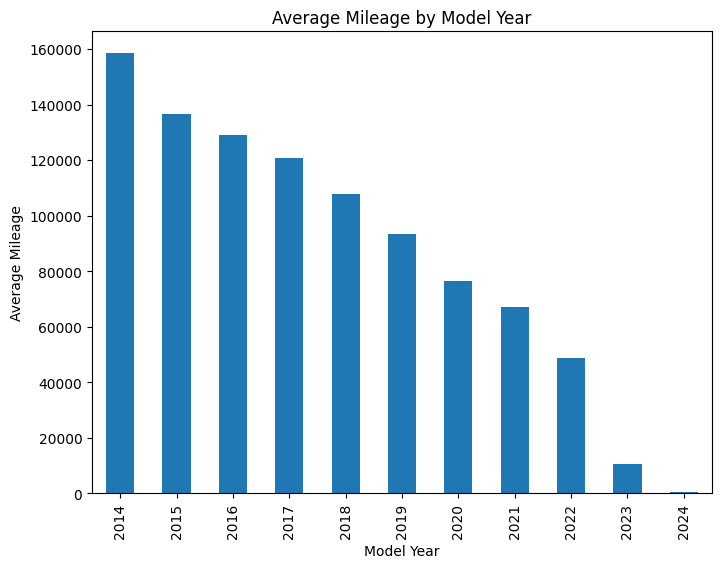

In [120]:
# mileage per year
plt.figure(figsize=(8, 6))
df_copy.groupby('model_year')['mileage'].mean().plot(kind='bar')
plt.title('Average Mileage by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Mileage')


This bar chart shows the average mileage of cars by their model year.

Newer Cars: Cars from recent years have lower mileage.
Older Cars: Cars from earlier years have higher mileage.
In short, newer cars usually have less mileage than older ones.





<ipython-input-121-961e318f881f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby(['model_year', 'transmission_from_vin']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))


<Figure size 800x600 with 0 Axes>

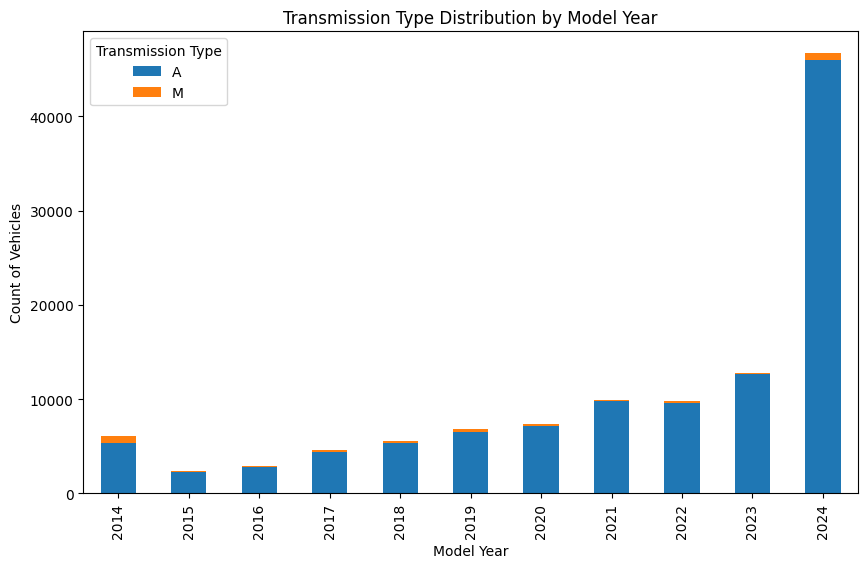

In [121]:
plt.figure(figsize=(8, 6))
df_copy.groupby(['model_year', 'transmission_from_vin']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Transmission Type Distribution by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count of Vehicles")
plt.legend(title="Transmission Type")
plt.show()


This bar chart shows how many cars have automatic (A) and manual (M) transmissions by model year.

Automatic Cars: Most cars, especially newer ones, have automatic transmissions.
Manual Cars: There are very few manual cars, especially in recent years.
In short, newer cars mostly use automatic transmissions.

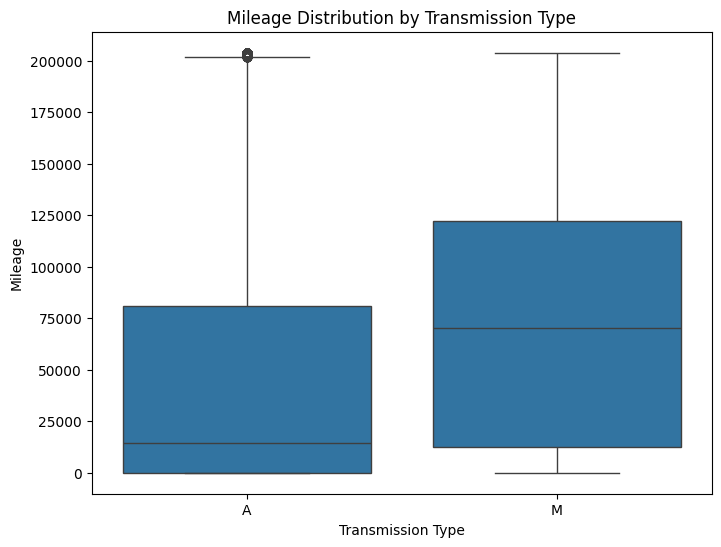

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_copy['transmission_from_vin'], y=df_copy['mileage'])
plt.title("Mileage Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Mileage")
plt.show()


This box plot shows the mileage distribution for cars based on their transmission type (automatic "A" and manual "M").

Key Points:
Automatic Cars (A): The mileage is generally higher, with some outliers having very high mileage.
Manual Cars (M): The mileage is lower on average compared to automatic cars, with fewer outliers.
In short, automatic cars tend to have higher mileage than manual cars.

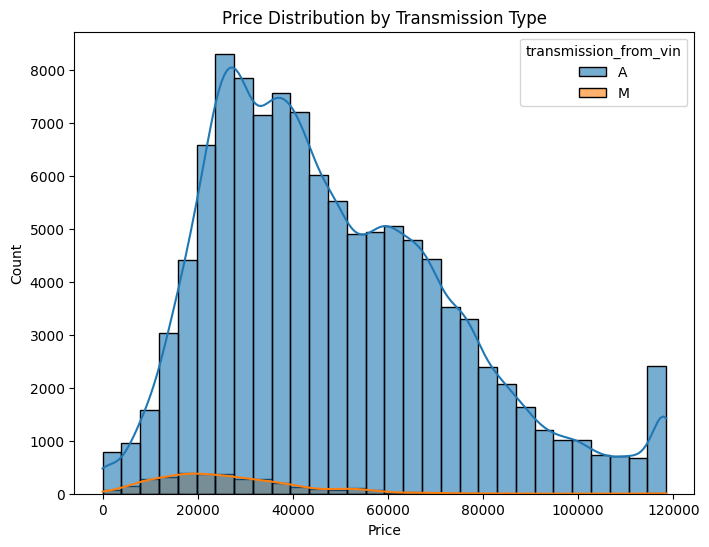

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(df_copy, x='price', hue='transmission_from_vin', bins=30, kde=True, alpha=0.6)
plt.title("Price Distribution by Transmission Type")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


The first chart displays car prices based on transmission types: automatic (A) and manual (M). Most automatic cars are priced between $15,000 and $45,000, with a peak around $20,000, indicating that they tend to be more expensive. In contrast, manual cars usually fall within the $10,000 to $30,000 range, showing that they are generally cheaper. Overall, automatic cars tend to cost more than manual ones. The second image zooms in on the lower price range to provide more detail about those prices.

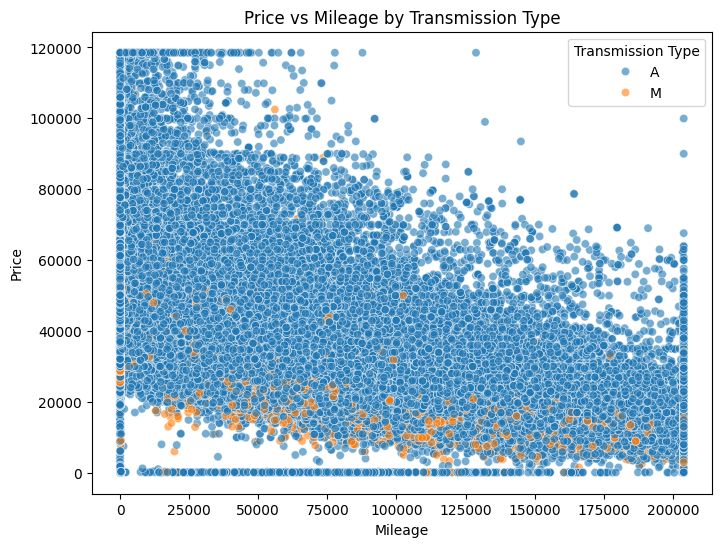

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='mileage', y='price', hue='transmission_from_vin', alpha=0.6)
plt.title('Price vs Mileage by Transmission Type')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Transmission Type')
plt.show()

Overall Trend: As cars have more mileage (how much they’ve been driven), their prices usually go down.

Transmission Types: There are two types of transmissions shown: 'A' for automatic and 'M' for manual. Most cars are automatic, especially the ones with lower mileage.

High Prices: A few expensive cars have high mileage, which might be special or luxury vehicles.

Main Observation: Most cars are found in the lower mileage and price areas.

In short, the plot shows that cars with less mileage are generally more expensive, and automatic cars are more common.